## Usando análise química para determinar a qualidade de vinhos

Detalhes do conjunto de dados podem ser encontrdos no portal [CI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine)

<center><img src="https://raw.githubusercontent.com/rauanisanfelice/python-wine/master/img/wine.jpeg", width=500></center> 

Esse dataset contém um conjunto de atributos (dados de sensores) sobre o processo de fabricação de vinhos.
Esses dados são utilizados para classificar, ao final do processo, a qualidade do vinho obtido. Existem informações como o teor alcoólico e nível de acidez. 

In [1]:
#Carregando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
#carregando o conjunto de dados
dados = pd.read_csv('winequality-red.csv', sep=';')

# Questão 1
Qual a justificativa em utilizar o **sep=';'** na carga do dados?

# Visualizando o conjunto de dados

In [3]:
dados.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Verificando informações do conjunto de dados

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Questão 2 
Quantas instâncias (registros) de vinhos e que atributos (características) cada um deles o conjunto de dados possui?

In [5]:
#dimensões do dataset
instancias,atributos = dados.shape

In [6]:
print(f"O dataset possue {instancias} instâncias e {atributos} atributos")

O dataset possue 1599 instâncias e 12 atributos


# Questão 3
Quantos tipos diferentes de dados existem no conjunto de dados?

In [7]:
tipos_de_dados = dados.dtypes.nunique()
feature1, feature2 = dados.dtypes.value_counts()
tipo1, tipo2 = dados.dtypes.unique()

In [8]:
print(f"Existem {tipos_de_dados} tipos de dados no dataset ({tipo1} e {tipo2})")
print(f"Existem {feature1} atributos do tipo {tipo1} e {feature2} atributos do tipo {tipo2}")

Existem 2 tipos de dados no dataset (float64 e int64)
Existem 11 atributos do tipo float64 e 1 atributos do tipo int64


In [9]:
print("Existem {} atributos do tipo {} e {} atributos do tipo {}.".format(dados.dtypes.value_counts()[0],
                                                                          dados.dtypes.value_counts().index[0],
                                                                          dados.dtypes.value_counts()[1], 
                                                                          dados.dtypes.value_counts().index[1]))

Existem 11 atributos do tipo float64 e 1 atributos do tipo int64.


# Questão 4
Algum registro possui valores nulos?

In [10]:
#verificando valores nulos
dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Uma visão geral do conjunto de dados

In [11]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Questão 5
Qual é o desvio padrão para a variável "fixed acidity"?

In [12]:
print('O desvio padrão para a variável "fixed acidity" é {}'.format(dados["fixed acidity"].std()))

O desvio padrão para a variável "fixed acidity" é 1.7410963181276953


# Questão 6
Qual é a mediana para a variável "residual sugar"?

In [13]:
#verificando características do dataset
dados["residual sugar"].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [14]:
print(f'A mediana para a variável "residual sugar" é {dados["residual sugar"].median()}')

A mediana para a variável "residual sugar" é 2.2


# Matriz de Correlação de Pearson

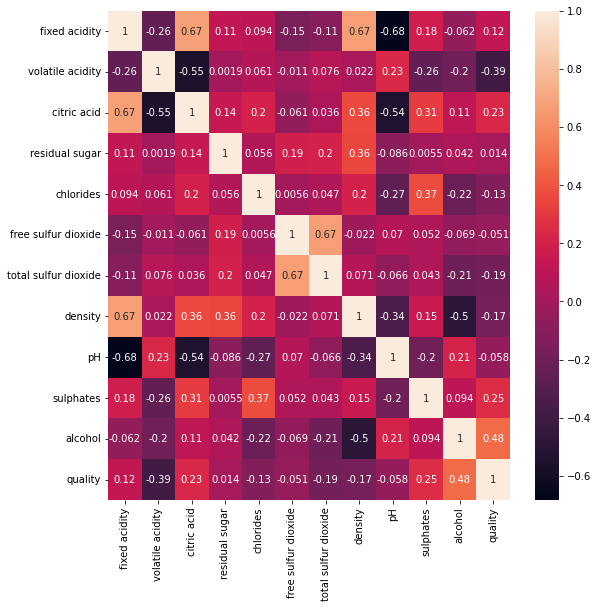

In [15]:
plt.figure(figsize=(9,9))
matriz_correlacao=dados.corr(method='pearson')
sns.heatmap(matriz_correlacao,annot=True)
plt.show()

# Questão 7
Qual o valor do coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH"?

In [16]:
# coeficiente de correlação de Pearson

from scipy import stats

a = dados['fixed acidity']
b = dados['pH']

stats.pearsonr(a, b)

(-0.6829781945685314, 4.063034039847446e-220)

In [17]:
# correlação

dados['fixed acidity'].corr(dados['pH'], method='pearson')

-0.6829781945685316

In [18]:
print('O coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é {}'. format(dados['fixed acidity'].corr(dados['pH'])))

O coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é -0.6829781945685316


# Questão 7.1
- Qual a interpletação do Coeficiente de Correlação?
- Explique Correlação x Causalidade

# Questão 8
Qual é o valor do coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol" e como podemos [interpretá-la](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) (forte, fraca, etc ...) 

In [19]:
# correlação direta

print('O coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é {}'.format(dados['quality'].corr(dados['alcohol'])))

O coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é 0.4761663240011358


# Questão 9
- Quantas instâncias existem para a variável 'quality' (qualidade do vinho) com valor igual a 5?    
- O Conjunto de dados é balanceado?
- Quantas classes (qualidade) distintas o conjunto de dados possui?

In [20]:
dados['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [21]:
dados['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [22]:
print('Para a qualidade do vinho igual a 5 existem {} instâncias'.format((dados['quality'] == 5).sum()))

Para a qualidade do vinho igual a 5 existem 681 instâncias


# Identificando possíveis outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'fixed acidity'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'citric acid'),
  Text(4, 0, 'residual sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'free sulfur dioxide'),
  Text(7, 0, 'total sulfur dioxide'),
  Text(8, 0, 'density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'sulphates'),
  Text(11, 0, 'alcohol'),
  Text(12, 0, 'quality')])

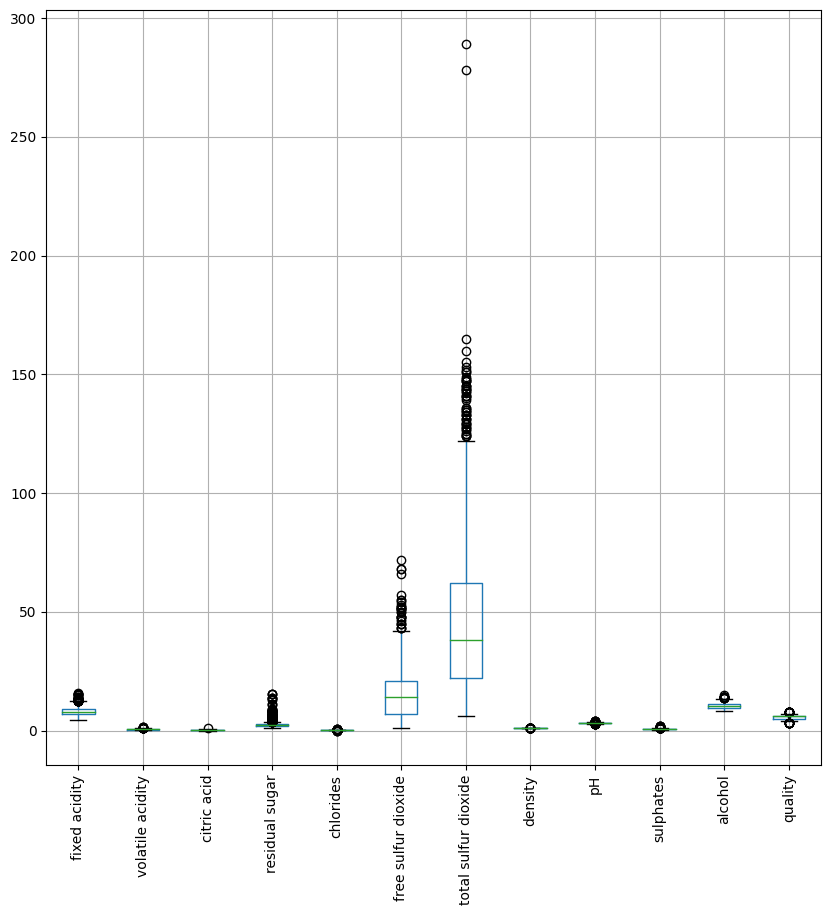

In [23]:
plt.figure(figsize=(10, 10),dpi=100)
dados[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].boxplot()
plt.xticks(rotation='vertical')

# Questão 10

- Observe a figura, consegue identificar os outliers?
- Atente para a escala do lado esquerdo da figura; procure relacionar a escala para cada uma das variáveis.

# Normalizando os dados

Aplicaremos o modelo de normalização MinMaxScaler com os valores "default" para o conjunto de dados

In [24]:
#Normalização o conjunto de dados.
from sklearn.preprocessing import MinMaxScaler

dataset_values = dados.values
#cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
scaler = MinMaxScaler(feature_range=(0.1, 0.9)) 
dataset = scaler.fit(dataset_values)

#Aplicando a escala, normalizando valores na escala de 0 a 1
dataset = scaler.fit_transform(dataset_values)
#nomeando colunas do novo dataFrame 
colunas = dados.columns 

#cria o dataframe com valore normalizados
dados_normalizados = pd.DataFrame(dataset,columns=[colunas])
dados_normalizados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.298230,0.417808,0.100,0.154795,0.185476,0.212676,0.179152,0.554038,0.585039,0.210180,0.223077,0.42
1,0.326549,0.516438,0.100,0.193151,0.214858,0.370423,0.272438,0.495301,0.389764,0.267665,0.272308,0.42
2,0.326549,0.450685,0.132,0.176712,0.206845,0.257746,0.235689,0.507048,0.427559,0.253293,0.272308,0.42
3,0.567257,0.187671,0.548,0.154795,0.184140,0.280282,0.252650,0.565786,0.364567,0.219760,0.272308,0.58
4,0.298230,0.417808,0.100,0.154795,0.185476,0.212676,0.179152,0.554038,0.585039,0.210180,0.223077,0.42


# Identificando possíveis outliers com valores normalizados

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, '(fixed acidity,)'),
  Text(2, 0, '(volatile acidity,)'),
  Text(3, 0, '(citric acid,)'),
  Text(4, 0, '(residual sugar,)'),
  Text(5, 0, '(chlorides,)'),
  Text(6, 0, '(free sulfur dioxide,)'),
  Text(7, 0, '(total sulfur dioxide,)'),
  Text(8, 0, '(density,)'),
  Text(9, 0, '(pH,)'),
  Text(10, 0, '(sulphates,)'),
  Text(11, 0, '(alcohol,)'),
  Text(12, 0, '(quality,)')])

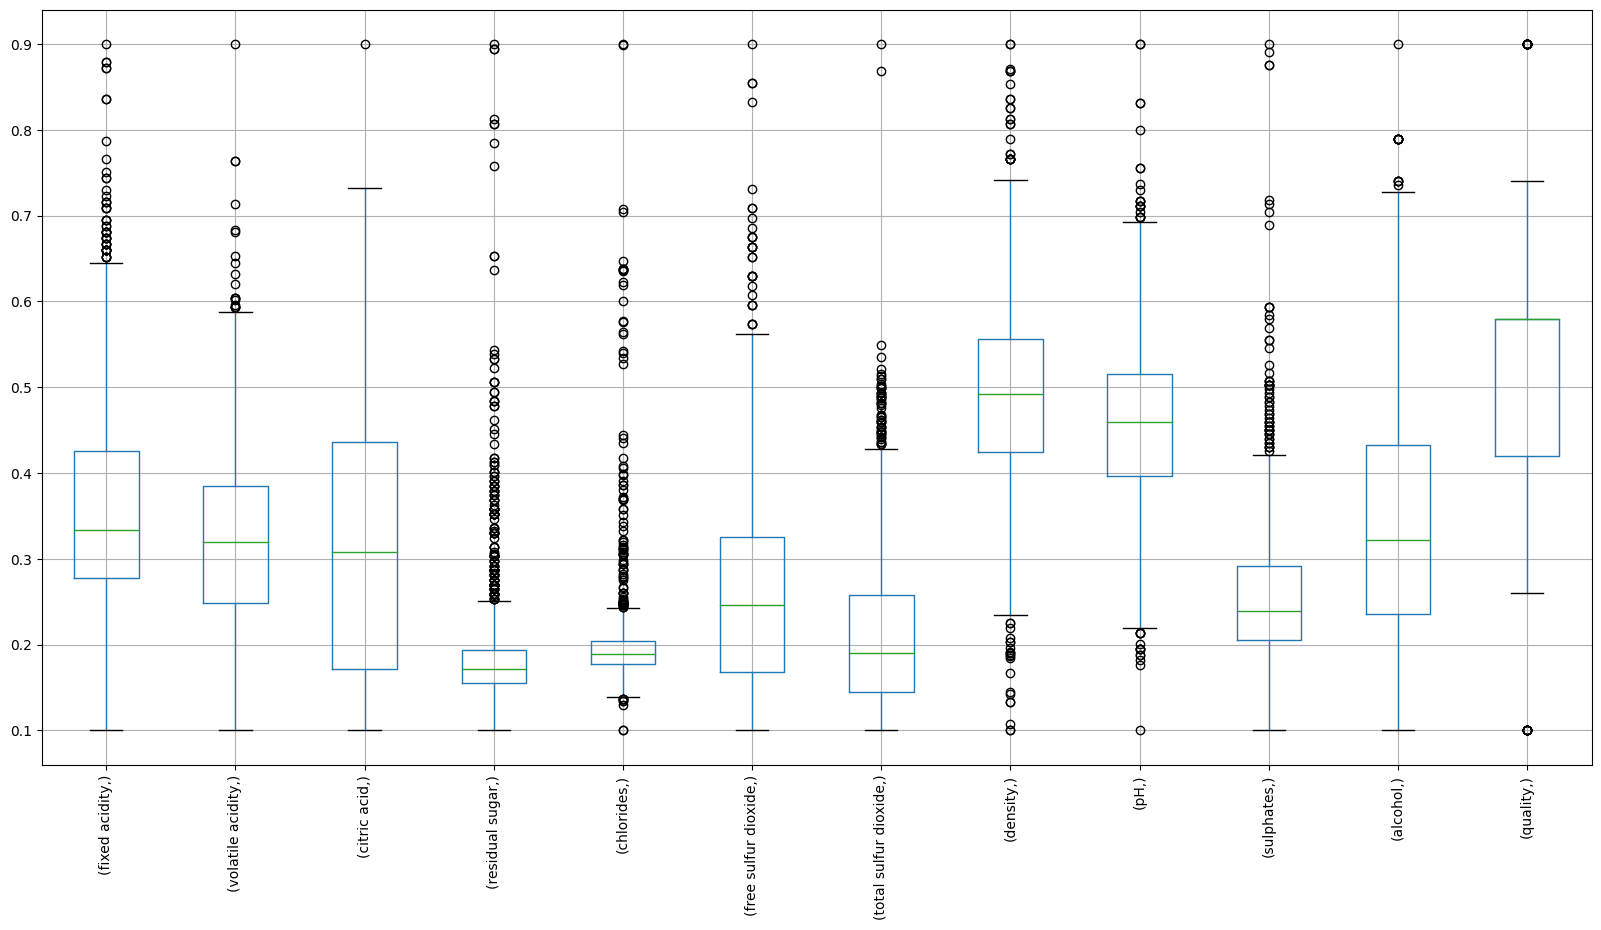

In [25]:
plt.figure(figsize=(20, 10),dpi=100)
dados_normalizados[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].boxplot()
plt.xticks(rotation='vertical')

# Questão 11
- Observe a figura, consegue identificar os outliers?
- Atente para a escala do lado esquerdo da figura; procure relacionar a escala para cada uma das variáveis.
- Compare as visualizações antes e após a normalização.

# Dividindo o conjunto de dados entre entradas (X) e saídas (y)

In [26]:
# Seleção das features pelo nome da coluna
X = dados[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']].values
y = dados['quality'].values

#Outra opção ...
#Seleção das features por indexação, seleção por posição.
# X = dados.iloc[:,:-1].values
# y = dados.iloc[:,-1]

# Questão 12
Normalize as entradas entre 0 e 1, utilizando **MinMaxScaler**

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler = scaler.fit(X)
X_normalizado = scaler.transform(X)

In [28]:


#realiza a normalização dos dados
# scaler.fit_transform(X)  

In [29]:
# # Divide o conjunto de dados em treinamento e teste 
# train_size = int(len(dataset) * 0.7)  #encontra o valor máximo para o treinamento
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# print(len(train), len(test)) #tamanho do df para treinamento e teste

# Questão 13
Divida o conjunto de dados em 65% de dados para treinamento e 35% de dados para testes

In [30]:
#realiza a divisão dos dados entre treinamento e teste
# função que realiza a divisão do dataset
from sklearn.model_selection import train_test_split   
# divide 35% para teste
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.35, random_state=42)

print(X_train)
print(X_test)

[[0.28318584 0.32191781 0.33       ... 0.4015748  0.1257485  0.15384615]
 [0.39823009 0.43835616 0.68       ... 0.12598425 0.5988024  0.10769231]
 [0.54867257 0.19178082 0.41       ... 0.26771654 0.20359281 0.13846154]
 ...
 [0.2300885  0.34246575 0.06       ... 0.60629921 0.1257485  0.16923077]
 [0.2920354  0.05479452 0.35       ... 0.45669291 0.28143713 0.53846154]
 [0.10619469 0.11643836 0.26       ... 0.51181102 0.1257485  0.78461538]]
[[0.27433628 0.30136986 0.08       ... 0.39370079 0.19760479 0.18461538]
 [0.28318584 0.26027397 0.17       ... 0.51181102 0.08982036 0.16923077]
 [0.53982301 0.37671233 0.22       ... 0.42519685 0.38922156 0.23076923]
 ...
 [0.2300885  0.2739726  0.07       ... 0.45669291 0.28742515 0.18461538]
 [0.69911504 0.32876712 0.49       ... 0.4015748  0.24550898 0.53846154]
 [0.27433628 0.10958904 0.3        ... 0.42519685 0.34131737 0.44615385]]


# Treinando um Algoritmo KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf_KNN = KNeighborsClassifier(n_neighbors=5) 
clf_KNN.fit(X_train, y_train) 
y_pred_KNN = clf_KNN.predict(X_test)
print("Acuracia para classificador KNN: ", accuracy_score(y_pred_KNN,y_test))

Acuracia para classificador KNN:  0.5589285714285714


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_KNN))


[[  0   0   1   1   0   0]
 [  0   0   7  12   1   0]
 [  1   1 160  68   3   0]
 [  0   0  76 129  20   0]
 [  0   0   8  41  24   0]
 [  0   0   2   1   4   0]]


/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


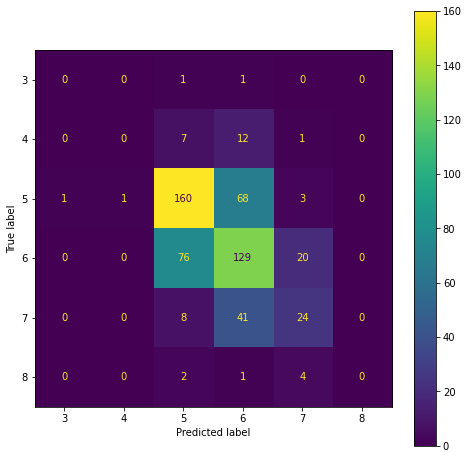

In [33]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(8, 8)
plot_confusion_matrix(clf_KNN, X_test, y_test)
plt.show()

In [34]:
# Crie um relatório de texto mostrando as principais métricas de classificação.
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.63      0.69      0.66       233
           6       0.51      0.57      0.54       225
           7       0.46      0.33      0.38        73
           8       0.00      0.00      0.00         7

    accuracy                           0.56       560
   macro avg       0.27      0.26      0.26       560
weighted avg       0.53      0.56      0.54       560



/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [35]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score

acuracia_KNN = accuracy_score(y_test, y_pred_KNN)

In [36]:
print(f'A acurária para o KNN é {acuracia_KNN}')

A acurária para o KNN é 0.5589285714285714


# Questão 14
Teste o modelo com outros valores para n_neighbors e compare o resultado.

# Questão 15
- Treine um Algoritmo de Árvore de Decisão utilizando os dados de entrada normalizados.
        - Calcule a acurácia;
        - Apresente a matriz de confusão;
        - Apresente precision | recall | f1-score, utilizando o classification_report;
        - Utilize DecisionTreeClassifier.

## Algoritmo Árvore de Decisão:

In [37]:
# importa o classificador árvore de decisão
from sklearn.tree import DecisionTreeClassifier 

# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred_arvore = clf_arvore.predict(X_test)

In [38]:
clf_arvore.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


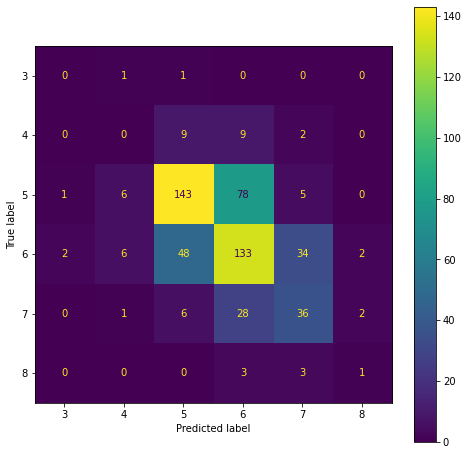

In [39]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(8, 8)
plot_confusion_matrix(clf_arvore, X_test, y_test)
plt.show()

In [40]:
# Crie um relatório de texto mostrando as principais métricas de classificação.
print(classification_report(y_test, y_pred_arvore))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.69      0.61      0.65       233
           6       0.53      0.59      0.56       225
           7       0.45      0.49      0.47        73
           8       0.20      0.14      0.17         7

    accuracy                           0.56       560
   macro avg       0.31      0.31      0.31       560
weighted avg       0.56      0.56      0.56       560



In [41]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score

acuracia_arvore = accuracy_score(y_test, y_pred_arvore)

In [42]:
print(f'A acurária para o algoritmo Árvore de Decisão é {acuracia_arvore}')

A acurária para o algoritmo Árvore de Decisão é 0.5589285714285714


# Questão 16
- Treine um Algoritmo de Floresta Randômica utilizando os dados de entrada normalizados.
        - Calcule a acurácia;
        - Apresente a matriz de confusão;
        - Apresente precision | recall | f1-score, utilizando o classification_report;
        - Utilize RandomForestClassifier(max_depth=10)

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Cria o objeto de classificação através do 
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

# Realiza o treinamento do classificador
clf_floresta = clf_floresta.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred_floresta = clf_floresta.predict(X_test)

/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


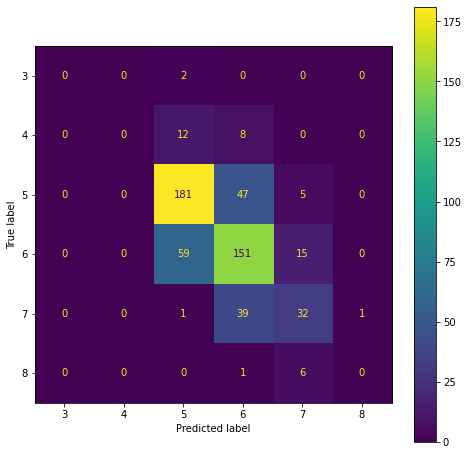

In [44]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(8, 8)
plot_confusion_matrix(clf_floresta, X_test, y_test)
plt.show()

In [45]:
# Crie um relatório de texto mostrando as principais métricas de classificação.
print(classification_report(y_test, y_pred_floresta))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.71      0.78      0.74       233
           6       0.61      0.67      0.64       225
           7       0.55      0.44      0.49        73
           8       0.00      0.00      0.00         7

    accuracy                           0.65       560
   macro avg       0.31      0.31      0.31       560
weighted avg       0.61      0.65      0.63       560



/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [46]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score

acuracia_floresta = accuracy_score(y_test, y_pred_floresta)

In [47]:
print(f'A acurária para o algoritmo Floresta Randômica é {acuracia_floresta}')

A acurária para o algoritmo Floresta Randômica é 0.65


# Questão 17
- Treine um Algoritmo SVM utilizando os dados de entrada normalizados.
        - Calcule a acurácia;
        - Apresente a matriz de confusão;
        - Apresente precision | recall | f1-score, utilizando o classification_report;
        - Utilize SVC(gamma='auto', kernel='rbf')

In [48]:
#biblioteca necessária para a construção do SVM
from sklearn.svm import SVC

#cria o objeto SVM
clf_svm=SVC(gamma='auto', kernel='rbf')

#realiza a classificação via SVM
clf_svm.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred_svm = clf_svm.predict(X_test)

/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


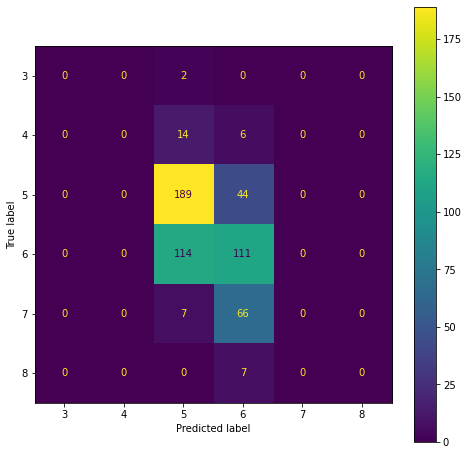

In [49]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(8, 8)
plot_confusion_matrix(clf_svm, X_test, y_test)
plt.show()

In [50]:
# Crie um relatório de texto mostrando as principais métricas de classificação.
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.58      0.81      0.68       233
           6       0.47      0.49      0.48       225
           7       0.00      0.00      0.00        73
           8       0.00      0.00      0.00         7

    accuracy                           0.54       560
   macro avg       0.18      0.22      0.19       560
weighted avg       0.43      0.54      0.48       560



/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [51]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score

acuracia_svm = accuracy_score(y_test, y_pred_svm)

In [52]:
print(f'A acurária para o algoritmo SVM é {acuracia_svm}')

A acurária para o algoritmo SVM é 0.5357142857142857


# Questão 18
- Treine um Algoritmo MLP utilizando os dados de entrada normalizados.
        - Calcule a acurácia;
        - Apresente a matriz de confusão;
        - Apresente precision | recall | f1-score, utilizando o classification_report;
        - Utilize MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1).

## Algoritmo Rede MLP:


In [53]:
from sklearn.neural_network import MLPClassifier

#cria o objeto MLP
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

#realiza a classificação via MLP
clf_mlp.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred_mlp = clf_mlp.predict(X_test)

/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


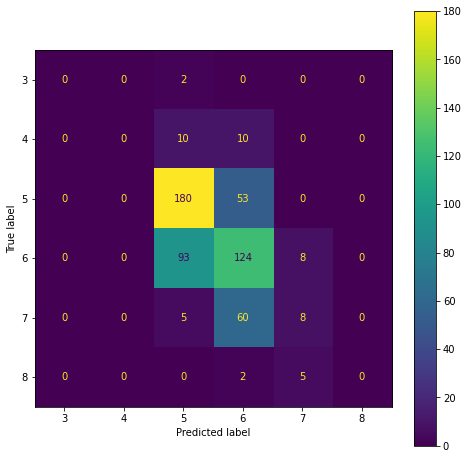

In [54]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(8, 8)
plot_confusion_matrix(clf_mlp, X_test, y_test)
plt.show()

In [55]:
# Crie um relatório de texto mostrando as principais métricas de classificação.
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.62      0.77      0.69       233
           6       0.50      0.55      0.52       225
           7       0.38      0.11      0.17        73
           8       0.00      0.00      0.00         7

    accuracy                           0.56       560
   macro avg       0.25      0.24      0.23       560
weighted avg       0.51      0.56      0.52       560



/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [56]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score

acuracia_mlp = accuracy_score(y_test, y_pred_mlp)

In [57]:
print(f'A acurária para o algoritmo Rede MLP é {acuracia_mlp}')

A acurária para o algoritmo Rede MLP é 0.5571428571428572


# Questão 19
- Compare a acurácia de todos os classificadores utilizados.

# Classificador binário (2 classes)

- Vamos modificar nosso conjunto de dados de forma a implmentar um classificador binário, isto é o vinho é bom ou não 2.    
- Consideraremos as qualidades 3, 4 e 5 como vinhos ruins (valor 0). Já as qualidades 6, 7 e 8 serão vinhos bons (valor 1).

In [58]:
#Fazendo uma cópia dos ados
dados2 = dados.copy()
#Criando a nova coluna e atribuindo valores conforme considerações acima
dados2['new_quality']= dados2['quality'].apply(lambda x: 0 if x<=5 else 1)
#Apagando a coluna qualidade antiga
dados2.drop(labels=['quality'],axis=1, inplace=True)

In [59]:
dados2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Questão 20
- Para o melhor classificador (maior acurácia) encontrado na questão 19, refaça o processo de:
        - Separação dos daados de entrada e saída;
        - Normalização;
        - Divisão do conjunto de dados (treinamento e testes);
        - Treinamento;
        - Predição; e
        - Métricas de qualidade.

In [60]:
#Dividindo os dados em entradas (X) e saída (y)
X = dados2.iloc[:,:-1].values
y = dados2.iloc[:,-1]

In [61]:
#Normalizando os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler = scaler.fit(X)
X_normalizado = scaler.transform(X)

In [62]:
#Separando os dados para Treinamento e Testes
from sklearn.model_selection import train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.30, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier 
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta = clf_floresta.fit(X_train,y_train)
y_pred_floresta = clf_floresta.predict(X_test)

/home/vagnersv/my_tensorflow/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


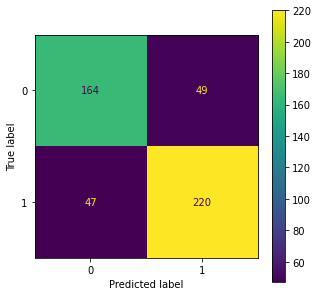

In [64]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(clf_floresta, X_test, y_test)
plt.show()

In [65]:
# Crie um relatório de texto mostrando as principais métricas de classificação.
print(classification_report(y_test, y_pred_floresta))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       213
           1       0.82      0.82      0.82       267

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



In [66]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score

acuracia_floresta = accuracy_score(y_test, y_pred_floresta)

In [67]:
print(f'A acurária para o algoritmo Floresta Randômica é {acuracia_floresta}')

A acurária para o algoritmo Floresta Randômica é 0.8
